In [64]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [65]:
#read the dataset
df=pd.read_csv(r'ccdefault.csv')

In [66]:
#drop "ID" column
df=df.drop(["ID"],axis=1)

In [67]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [68]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [69]:
#Check for missing values
df.isnull().describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000


In [70]:
#Creat feature variables and target variable
X=df.drop(["DEFAULT"],axis=1)
y=df["DEFAULT"]

In [72]:
#Check the dimensions of X and y
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


In [73]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [74]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
#normalisation of data
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [59]:
X.shape

(30000, 23)

In [61]:
X[0:5]

array([[-1.13672015,  0.81016074,  0.18582826, -1.05729503, -1.24601985,
         1.79456386,  1.78234817, -0.69666346, -0.66659873, -1.53004603,
        -1.48604076, -0.64250107, -0.64739923, -0.66799331, -0.67249727,
        -0.66305853, -0.65272422, -0.34194162, -0.22708564, -0.29680127,
        -0.30806256, -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826,  0.85855728, -1.02904717,
        -0.87499115,  1.78234817,  0.1388648 ,  0.18874609,  0.23491652,
         1.99231551, -0.65921875, -0.66674657, -0.63925429, -0.62163594,
        -0.60622927, -0.59796638, -0.34194162, -0.21358766, -0.24000461,
        -0.24422965, -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826,  0.85855728, -0.16115646,
         0.01486052,  0.1117361 ,  0.1388648 ,  0.18874609,  0.23491652,
         0.25313738, -0.29855966, -0.49389911, -0.48240819, -0.44973025,
        -0.41718767, -0.39162956, -0.25029158, -0.19188673, -0.24000461,
        -0.24422965, -0.2486

In [77]:
#Split into training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [84]:
RF=RandomForestClassifier()
param_range=[10,25,50,100,200,300,500]
param_grid=[{'n_estimators':param_range}]
gs=GridSearchCV(RF,param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [87]:
print(gs.best_score_)
print(gs.best_params_)

0.817037037037037
{'n_estimators': 300}


In [88]:
gs.cv_results_

{'mean_fit_time': array([ 0.88228457,  1.98033154,  4.02544069,  7.75938206, 16.1130228 ,
        23.74066846, 40.03448379]),
 'std_fit_time': array([0.03945032, 0.04681284, 0.21624559, 0.06630954, 0.36166477,
        0.33442135, 1.03897507]),
 'mean_score_time': array([0.01919546, 0.024651  , 0.05852828, 0.09136331, 0.17712181,
        0.28936684, 0.48300605]),
 'std_score_time': array([0.01025901, 0.00136819, 0.01587532, 0.00894937, 0.00660815,
        0.03709074, 0.0764575 ]),
 'param_n_estimators': masked_array(data=[10, 25, 50, 100, 200, 300, 500],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 25},
  {'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 200},
  {'n_estimators': 300},
  {'n_estimators': 500}],
 'split0_test_score': array([0.80303591, 0.80377638, 0.80673825, 0.81266198, 0.81303221,
        0.81599408, 0.81303221]),
 'split1_tes

In [92]:
rf_best=RandomForestClassifier(n_estimators=300,random_state=1)
rf_best.fit(X_train,y_train)
print("Training accuracy: ",rf_best.score(X_train,y_train))

Training accuracy:  0.9994074074074074


In [93]:
print("Test accuracy:", rf_best.score(X_test,y_test))

Test accuracy: 0.82


In [96]:
feat_labels=df.columns[1:]
importances=rf_best.feature_importances_
indices=np.argsort(importances)[::-1]

for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i + 1, 30,feat_labels[indices[i]],importances[indices[i]]))

 1) PAY_2                          0.095883
 2) PAY_0                          0.066562
 3) BILL_AMT2                      0.060495
 4) SEX                            0.059768
 5) BILL_AMT3                      0.054251
 6) BILL_AMT4                      0.052106
 7) PAY_AMT2                       0.050605
 8) PAY_AMT1                       0.050560
 9) BILL_AMT6                      0.050206
10) BILL_AMT5                      0.050168
11) PAY_3                          0.047853
12) PAY_AMT3                       0.047735
13) PAY_AMT4                       0.046783
14) DEFAULT                        0.046043
15) PAY_AMT6                       0.043524
16) PAY_AMT5                       0.043034
17) PAY_4                          0.026449
18) PAY_5                          0.022563
19) MARRIAGE                       0.020459
20) PAY_6                          0.020110
21) BILL_AMT1                      0.018622
22) AGE                            0.014161
23) EDUCATION                   

(-1, 23)

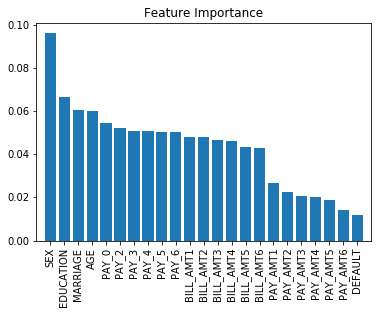

In [97]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])


In [98]:
#I got help from Rakesh Reddy Mudhireddy in this assignment
print("My name is Jianwei Su")
print("My NetID is jianwei5")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Jianwei Su
My NetID is jianwei5
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
